# Ride sharing company rides analysis


## Project description
You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.
You'll study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.

In [1]:
#load libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random as random


from functools import reduce
from math import factorial
from scipy import stats as st
from statistics import mean 
from IPython.display import display
from random import sample


pd.set_option('display.max_columns', 500)

In [2]:
#load all data
company_rides = pd.read_csv('/datasets/project_sql_result_01.csv')
data_dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')

Now let's have a look at this data.

In [3]:
company_rides.sample(15)

,company_name,trips_amount
30,Setare Inc,230
40,6574 - Babylon Express Inc.,31
44,2092 - 61288 Sbeih Company,27
9,Blue Ribbon Taxi Association Inc.,5953
0,Flash Cab,19558
15,Checker Taxi Affiliation,2216
25,Top Cab Affiliation,978
33,Metro Jet Taxi A,146
29,303 Taxi,250
54,2192 - 73487 Zeymane Corp,14


In [4]:
company_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
company_rides.describe(include='all')

,company_name,trips_amount
count,64,64.000000
unique,64,NaN
top,Chicago Taxicab,NaN
freq,1,NaN
mean,NaN,2145.484375
std,NaN,3812.310186
min,NaN,2.000000
25%,NaN,20.750000
50%,NaN,178.500000
75%,NaN,2106.500000


No dublicates found and all formats for this dataset look OK.

In [6]:
data_dropoff.sample(15)

,dropoff_location_name,average_trips
9,Sheffield & DePaul,1259.766667
55,Dunning,30.166667
33,Portage Park,119.733333
45,Boystown,53.966667
62,Brighton Park,19.466667
25,Irving Park,296.566667
82,South Deering,7.500000
36,Kenwood,89.366667
43,Mckinley Park,64.033333
1,River North,9523.666667


In [7]:
data_dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
data_dropoff.describe(include='all')

,dropoff_location_name,average_trips
count,94,94.000000
unique,94,NaN
top,Streeterville,NaN
freq,1,NaN
mean,NaN,599.953728
std,NaN,1714.591098
min,NaN,1.800000
25%,NaN,14.266667
50%,NaN,52.016667
75%,NaN,298.858333


Same here. No dublicates found and all formats look okay. I already see that there is a huge spread between amount of trips taken to different neighboorhoods.

### identify the top 10 neighborhoods in terms of drop-offs and make graph.

In [9]:
top_neighboorhoods=data_dropoff.sort_values(by='average_trips', ascending=False).head(10).round(2)

top_neighboorhoods

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


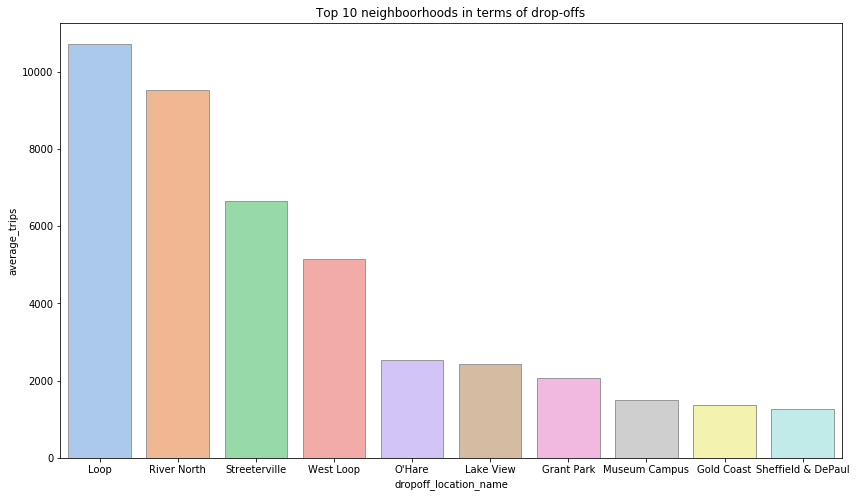

In [10]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_title('Top 10 neighboorhoods in terms of drop-offs')
sns.catplot(data=top_neighboorhoods, x="dropoff_location_name", y='average_trips', kind="bar", palette="pastel",
            edgecolor=".6", ax=ax)
plt.close(2);

This plot shows us that the 4 most popular neighbourhoods are much more popular than other ones. Loop neighboorhood gets almost 10 times more dropoffs than Sheffield & DePaul.

### Make graph for taxi companies and number of rides.

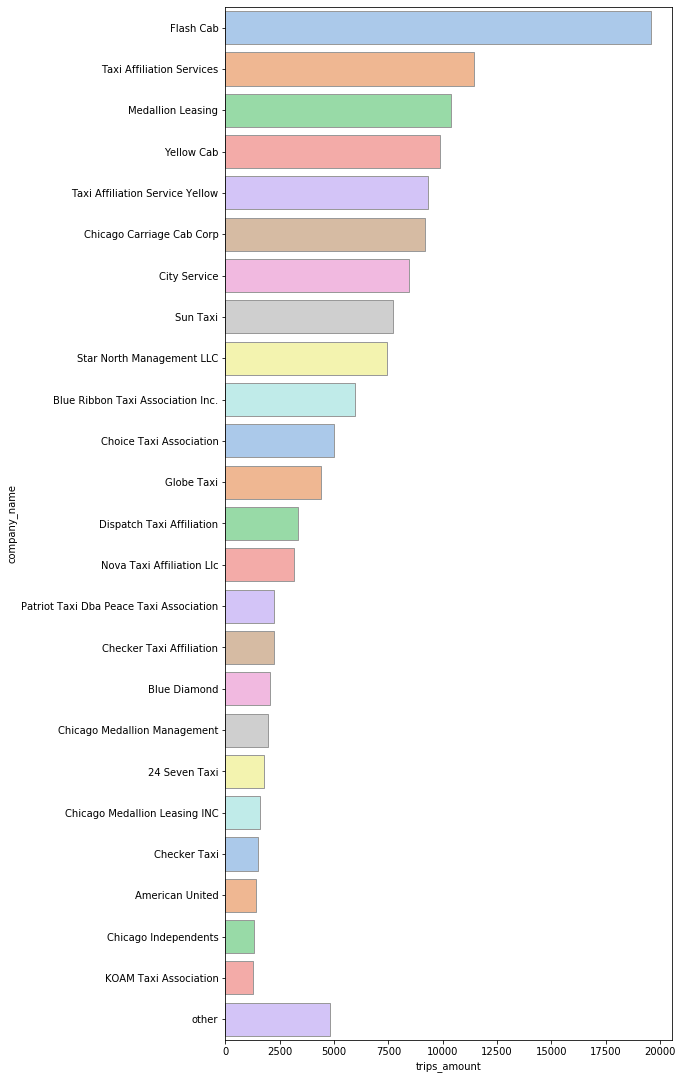

In [11]:
#group all companies that have less than 1100 trips to other
df = (company_rides.query('trips_amount >=1100')
            .append(pd.Series(['other',company_rides.query('trips_amount<1100').trips_amount.sum()],
                              index = ['company_name','trips_amount']), ignore_index=True))

fig, ax1 = plt.subplots(figsize=(8,19))
ax.set_title('Trips amounts for different companies')
sns.catplot(data=df, y="company_name", x='trips_amount', kind="bar", palette="pastel", edgecolor=".6",
            ax=ax1)
plt.close(2);

From this data I see that Flash cab is a definite leader with  a much higher amount of rides than their competitors.  And also the market is mostly rulled by big companies, small companies even combined don't give comparabile amount of rides to bigger ones.

## Step 5. Testing hypotheses (Python)

Test the hypothesis:


<b> "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays." </b>

In [12]:
# import new dataframe
data = pd.read_csv('/datasets/project_sql_result_07.csv')
#look at sample
data.sample(15)

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
932,2017-11-04 12:00:00,Good,3180.0
495,2017-11-18 16:00:00,Bad,2940.0
347,2017-11-11 17:00:00,Good,2460.0
1021,2017-11-11 10:00:00,Good,1330.0
207,2017-11-11 08:00:00,Good,1200.0
408,2017-11-11 11:00:00,Good,1320.0
921,2017-11-04 17:00:00,Bad,2518.0
886,2017-11-11 18:00:00,Good,1978.0
147,2017-11-04 16:00:00,Bad,3180.0


In [13]:
#convert date to datetime
data['start_ts']=pd.to_datetime(data.start_ts, format='%Y-%m-%d %H:%M:%S')

In [14]:
#Check what days of week are in the dataframe
data.start_ts.dt.dayofweek.value_counts()

5    1068
Name: start_ts, dtype: int64

Seems like all the days in the dataframe are saturday, which is good for us, because that's all we need. Now let's create two lists: one with data for rainy saturdays, one with data for other saturdays. But firstly let's check amount of rainy days compaired to sunny ones.

In [15]:
data.weather_conditions.value_counts()

Good    888
Bad     180
Name: weather_conditions, dtype: int64

In [16]:
bad_weather = data.query('weather_conditions == "Bad"')['duration_seconds'].dropna().tolist()
good_weather = data.query('weather_conditions == "Good"')['duration_seconds'].dropna().tolist()

Amount of values for good weather: 888
Amount of values for bad weather: 180
Variance of ride length for good weather: 575732.93
Variance of ride length for bad weather: 517403.56
Average ride length for good weather: 1999.68
Average ride length for bad weather: 2427.21


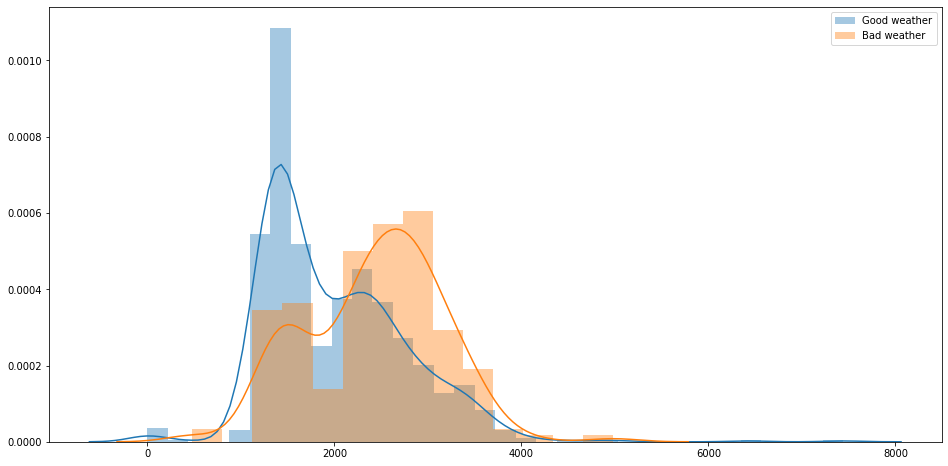

In [17]:
#check how does the data look
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(good_weather, label='Good weather');
sns.distplot(bad_weather, label='Bad weather');
plt.legend();

print ("Amount of values for good weather:", len(good_weather))
print ("Amount of values for bad weather:", len(bad_weather))

print ('Variance of ride length for good weather: {:.2f}'.format(np.var(good_weather)))
print ('Variance of ride length for bad weather: {:.2f}'.format(np.var(bad_weather)))
print ('Average ride length for good weather: {:.2f}'.format(mean(good_weather)))
print ('Average ride length for bad weather: {:.2f}'.format(mean(bad_weather)))

There are much more good  weather days in the dataset than rainy ones. To test a theory we are going to need equal samples. Therefore I will take a random sample with length values for data with good weather. 

In [18]:
good_weather = random.sample(good_weather, len(bad_weather))

We can already see that these samples don't have quite normal distribution, and also even based on the graphs they are pretty different. Here A-B test is not the best tool to use for testing, but unfortunatly we don't know how to do other tests, therefore I will use it.

Now I need to form a Null hypothesis. Null hypothesis should be positive, therefore here  right null hypothesis will be:

<b> "The average duration of rides from the Loop to O'Hare International Airport is the same on rainy Saturdays as it is on not rainy saturdays" </b>

In [19]:
alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis



    
results = st.ttest_ind(
    good_weather,
    bad_weather, equal_var = False)

print('p-value: {:.8f}'.format(results.pvalue))

if results.pvalue < alpha:
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value: 0.00000020
We reject the null hypothesis


### Conclusion

Based on out test I can say thet the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is not the same as average duration of rides on sunny Saturdays.